# MIT Project

### Sample from kaggle for a person to predict if he likes the song or not according to acousticness, danceability, duration_ms, enegy, instrumentalness, key, liveness, loudness, mode, speechiness

#### This project is about how can we determine which classifier is better for our datasets.

In [1]:
import pandas as pd
import numpy as np

# machine learning imports here
from sklearn import tree
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

# graphical
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

#scores
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, f1_score, recall_score

import graphviz
import pydotplus
import io
import scipy.misc
%matplotlib inline

In [2]:
data = pd.read_csv('data.csv')

## Data sample descirption, head and info

In [3]:
data.describe()

Unnamed: 0  acousticness  danceability   duration_ms       energy  \
count  2017.000000   2017.000000   2017.000000  2.017000e+03  2017.000000   
mean   1008.000000      0.187590      0.618422  2.463062e+05     0.681577   
std     582.402066      0.259989      0.161029  8.198181e+04     0.210273   
min       0.000000      0.000003      0.122000  1.604200e+04     0.014800   
25%     504.000000      0.009630      0.514000  2.000150e+05     0.563000   
50%    1008.000000      0.063300      0.631000  2.292610e+05     0.715000   
75%    1512.000000      0.265000      0.738000  2.703330e+05     0.846000   
max    2016.000000      0.995000      0.984000  1.004627e+06     0.998000   

       instrumentalness          key     liveness     loudness         mode  \
count       2017.000000  2017.000000  2017.000000  2017.000000  2017.000000   
mean           0.133286     5.342588     0.190844    -7.085624     0.612295   
std            0.273162     3.648240     0.155453     3.761684     0.487347   
min            0.000000     0.000000     0.018800   -33.097000     0.000000   
25%            0.000000     2.000000     0.092300    -8.394000     0.000000   
50%            0.000076     6.000000     0.127000    -6.248000     1.000000   
75%            0.054000     9.000000     0.247000    -4.746000     1.000000   
max            0.976000    11.000000     0.969000    -0.307000     1.000000   

       speechiness        tempo  time_signature      valence       target  
count  2017.000000  2017.000000     2017.000000  2017.000000  2017.000000  
mean      0.092664   121.603272        3.968270     0.496815     0.505702  
std       0.089931    26.685604        0.255853     0.247195     0.500091  
min       0.023100    47.859000        1.000000     0.034800     0.000000  
25%       0.037500   100.189000        4.000000     0.295000     0.000000  
50%       0.054900   121.427000        4.000000     0.492000     1.000000  
75%       0.108000   137.849000        4.000000     0.691000     1.000000  
max       0.816000   219.331000        5.000000     0.992000     1.000000

In [4]:
data.head()

Unnamed: 0  acousticness  danceability  duration_ms  energy  \
0           0        0.0102         0.833       204600   0.434   
1           1        0.1990         0.743       326933   0.359   
2           2        0.0344         0.838       185707   0.412   
3           3        0.6040         0.494       199413   0.338   
4           4        0.1800         0.678       392893   0.561   

   instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0          0.021900    2    0.1650    -8.795     1       0.4310  150.062   
1          0.006110    1    0.1370   -10.401     1       0.0794  160.083   
2          0.000234    2    0.1590    -7.148     1       0.2890   75.044   
3          0.510000    5    0.0922   -15.236     1       0.0261   86.468   
4          0.512000    5    0.4390   -11.648     0       0.0694  174.004   

   time_signature  valence  target      song_title            artist  
0             4.0    0.286       1        Mask Off            Future  
1             4.0    0.588       1         Redbone  Childish Gambino  
2             4.0    0.173       1    Xanny Family            Future  
3             4.0    0.230       1  Master Of None       Beach House  
4             4.0    0.904       1  Parallel Lines       Junior Boys

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [38]:
pos_acoustic = data[data['target'] == 1]['acousticness']
neg_acoustic = data[data['target'] == 0]['acousticness']

pos_dance = data[data['target'] == 1]['danceability']
neg_dance = data[data['target'] == 0]['danceability']

pos_duration = data[data['target'] == 1]['duration_ms']
neg_duration = data[data['target'] == 0]['duration_ms']

pos_energy = data[data['target'] == 1]['energy']
neg_energy = data[data['target'] == 0]['energy']

pos_instrumentalness = data[data['target'] == 1]['instrumentalness']
neg_instrumentalness = data[data['target'] == 0]['instrumentalness']

pos_key = data[data['target'] == 1]['key']
neg_key = data[data['target'] == 0]['key']

pos_liveness = data[data['target'] == 1]['liveness']
neg_liveness = data[data['target'] == 0]['liveness']

pos_loudness = data[data['target'] == 1]['loudness']
neg_loudness = data[data['target'] == 0]['loudness']

pos_mode = data[data['target'] == 1]['mode']
neg_mode = data[data['target'] == 0]['mode']

pos_speechiness = data[data['target'] == 1]['speechiness']
neg_speechiness = data[data['target'] == 0]['speechiness']

pos_tempo = data[data['target'] == 1]['tempo']
neg_tempo = data[data['target'] == 0]['tempo']

pos_valence = data[data['target'] == 1]['valence']
neg_valence = data[data['target'] == 0]['valence']

pos_time = data[data['target'] == 1]['time_signature']
neg_time = data[data['target'] == 0]['time_signature']



## Spliting up our Data and making then into 5 folds using KFold

this is a technique to properly find what type of classifiers are we going to use the this kind of dataset.

I made my own object to determine the measurements of every classifiers through my dataset.

In [6]:
# getting the features
features = ["danceability", "loudness", "valence", "energy", "instrumentalness", "acousticness", "key", "speechiness", "duration_ms"]

In [7]:
class EvaluationClassification:
    def __init__(self, data,features = [], target_features = [] , folds=5):
        self.features = features
        self.target_features = target_features
        self.data = data
        self.folds = folds
    
    def get_info_data(self):
        return data.info()
    
    def get_head_data(self):
        return data.head()
    
    def get_description(self):
        return data.describe()
    
    def _do_evaluation_with_skfold(self, model):
        fold = StratifiedKFold(n_splits=self.folds)
        mod = model
        feature_data = data[self.features]
        target_data = data[self.target_features]
        evaluations = []
        for train_index, test_index in fold.split(feature_data, target_data):
            x_train = feature_data.loc[train_index]
            x_test = feature_data.loc[test_index]
            y_train = target_data.loc[train_index]
            y_test = target_data.loc[test_index]
            
            fit = mod.fit(x_train, y_train.values.ravel())
            y_pred = fit.predict(x_test)
            conf_matrix = confusion_matrix(y_test, y_pred)
            evaluations.append(
                {
                    'accuracy': accuracy_score(y_test, y_pred),
                    'precision' : precision_score(y_test, y_pred),
                    'recall' : recall_score(y_test, y_pred),
                    'sensitivity' : conf_matrix[0,0]/(conf_matrix[0,0] + conf_matrix[0,1]),
                    'specificity' : conf_matrix[1,1]/(conf_matrix[1,0] + conf_matrix[1,1]),
                    'f1-score' : f1_score(y_test, y_pred)
                }
            )
            
        return evaluations
            
    
    def evaluate_decision_tree(self):
        return self._do_evaluation_with_skfold(DecisionTreeClassifier(min_samples_split=100))
    
    def evaluate_naive_bayes(self):
        return self._do_evaluation_with_skfold(GaussianNB())
    
    def evaluate_support_vector_machine(self):
        return self._do_evaluation_with_skfold(svm.SVC())

    def evaluate_k_nearest_neighbor(self):
        return self._do_evaluation_with_skfold(KNeighborsClassifier())
    
    def evaluate_logical_regression(self):
        return self._do_evaluation_with_skfold(LogisticRegression())
        

In [8]:
evaluation = EvaluationClassification(data=data, features=features, target_features=['target'])

In [9]:
decision_tree = evaluation.evaluate_decision_tree()
decision_tree

[{'accuracy': 0.7202970297029703,
  'precision': 0.7630057803468208,
  'recall': 0.6470588235294118,
  'sensitivity': 0.795,
  'specificity': 0.6470588235294118,
  'f1-score': 0.7002652519893899},
 {'accuracy': 0.6014851485148515,
  'precision': 0.592274678111588,
  'recall': 0.6764705882352942,
  'sensitivity': 0.525,
  'specificity': 0.6764705882352942,
  'f1-score': 0.631578947368421},
 {'accuracy': 0.56575682382134,
  'precision': 0.5568627450980392,
  'recall': 0.696078431372549,
  'sensitivity': 0.4321608040201005,
  'specificity': 0.696078431372549,
  'f1-score': 0.6187363834422659},
 {'accuracy': 0.7096774193548387,
  'precision': 0.7253886010362695,
  'recall': 0.6862745098039216,
  'sensitivity': 0.7336683417085427,
  'specificity': 0.6862745098039216,
  'f1-score': 0.7052896725440806},
 {'accuracy': 0.6898263027295285,
  'precision': 0.6740088105726872,
  'recall': 0.75,
  'sensitivity': 0.628140703517588,
  'specificity': 0.75,
  'f1-score': 0.7099767981438514}]

In [10]:
naive_bayes = evaluation.evaluate_naive_bayes()
naive_bayes

[{'accuracy': 0.6905940594059405,
  'precision': 0.6740088105726872,
  'recall': 0.75,
  'sensitivity': 0.63,
  'specificity': 0.75,
  'f1-score': 0.7099767981438514},
 {'accuracy': 0.5643564356435643,
  'precision': 0.5598290598290598,
  'recall': 0.6421568627450981,
  'sensitivity': 0.485,
  'specificity': 0.6421568627450981,
  'f1-score': 0.5981735159817351},
 {'accuracy': 0.4665012406947891,
  'precision': 0.46745562130177515,
  'recall': 0.3872549019607843,
  'sensitivity': 0.5477386934673367,
  'specificity': 0.3872549019607843,
  'f1-score': 0.42359249329758714},
 {'accuracy': 0.5732009925558312,
  'precision': 0.5661157024793388,
  'recall': 0.6715686274509803,
  'sensitivity': 0.4723618090452261,
  'specificity': 0.6715686274509803,
  'f1-score': 0.6143497757847534},
 {'accuracy': 0.5831265508684863,
  'precision': 0.5608108108108109,
  'recall': 0.8137254901960784,
  'sensitivity': 0.34673366834170855,
  'specificity': 0.8137254901960784,
  'f1-score': 0.6640000000000001}]

In [11]:
support_vector_machine = evaluation.evaluate_support_vector_machine()
support_vector_machine

[{'accuracy': 0.5816831683168316,
  'precision': 0.8888888888888888,
  'recall': 0.19607843137254902,
  'sensitivity': 0.975,
  'specificity': 0.19607843137254902,
  'f1-score': 0.321285140562249},
 {'accuracy': 0.5445544554455446,
  'precision': 0.6190476190476191,
  'recall': 0.2549019607843137,
  'sensitivity': 0.84,
  'specificity': 0.2549019607843137,
  'f1-score': 0.3611111111111111},
 {'accuracy': 0.48635235732009924,
  'precision': 0.48760330578512395,
  'recall': 0.28921568627450983,
  'sensitivity': 0.6884422110552764,
  'specificity': 0.28921568627450983,
  'f1-score': 0.3630769230769231},
 {'accuracy': 0.5607940446650124,
  'precision': 0.6753246753246753,
  'recall': 0.2549019607843137,
  'sensitivity': 0.8743718592964824,
  'specificity': 0.2549019607843137,
  'f1-score': 0.3701067615658363},
 {'accuracy': 0.607940446650124,
  'precision': 0.7254901960784313,
  'recall': 0.3627450980392157,
  'sensitivity': 0.8592964824120602,
  'specificity': 0.3627450980392157,
  'f1-sc

In [12]:
k_nearest_neighbor = evaluation.evaluate_k_nearest_neighbor()
k_nearest_neighbor

[{'accuracy': 0.5742574257425742,
  'precision': 0.5879120879120879,
  'recall': 0.5245098039215687,
  'sensitivity': 0.625,
  'specificity': 0.5245098039215687,
  'f1-score': 0.5544041450777202},
 {'accuracy': 0.5742574257425742,
  'precision': 0.5761904761904761,
  'recall': 0.5931372549019608,
  'sensitivity': 0.555,
  'specificity': 0.5931372549019608,
  'f1-score': 0.5845410628019324},
 {'accuracy': 0.5136476426799007,
  'precision': 0.5165289256198347,
  'recall': 0.6127450980392157,
  'sensitivity': 0.4120603015075377,
  'specificity': 0.6127450980392157,
  'f1-score': 0.5605381165919282},
 {'accuracy': 0.5632754342431762,
  'precision': 0.5786516853932584,
  'recall': 0.5049019607843137,
  'sensitivity': 0.6231155778894473,
  'specificity': 0.5049019607843137,
  'f1-score': 0.5392670157068062},
 {'accuracy': 0.5905707196029777,
  'precision': 0.5960591133004927,
  'recall': 0.5931372549019608,
  'sensitivity': 0.5879396984924623,
  'specificity': 0.5931372549019608,
  'f1-score

In [13]:
logical_regression = evaluation.evaluate_logical_regression()
logical_regression

[{'accuracy': 0.504950495049505,
  'precision': 0.504950495049505,
  'recall': 1.0,
  'sensitivity': 0.0,
  'specificity': 1.0,
  'f1-score': 0.6710526315789473},
 {'accuracy': 0.504950495049505,
  'precision': 0.504950495049505,
  'recall': 1.0,
  'sensitivity': 0.0,
  'specificity': 1.0,
  'f1-score': 0.6710526315789473},
 {'accuracy': 0.5062034739454094,
  'precision': 0.5062034739454094,
  'recall': 1.0,
  'sensitivity': 0.0,
  'specificity': 1.0,
  'f1-score': 0.6721581548599671},
 {'accuracy': 0.5062034739454094,
  'precision': 0.5062034739454094,
  'recall': 1.0,
  'sensitivity': 0.0,
  'specificity': 1.0,
  'f1-score': 0.6721581548599671},
 {'accuracy': 0.5062034739454094,
  'precision': 0.5062034739454094,
  'recall': 1.0,
  'sensitivity': 0.0,
  'specificity': 1.0,
  'f1-score': 0.6721581548599671}]

# Graphical Representation

Generate graphs for every measurement of every classifiers we have.

In [14]:
labels = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'Sensitivity', 'f1-score']
bar_labels = ['DT', 'NB', 'LR', 'SVM', 'KNN']
ditree = [
    (decision_tree[0]['accuracy'] * 100),
    (decision_tree[0]['precision'] * 100),
    (decision_tree[0]['recall'] * 100),
    (decision_tree[0]['specificity'] * 100),
    (decision_tree[0]['sensitivity'] * 100),
    (decision_tree[0]['f1-score'] * 100)
]

naive_b = [
    (naive_bayes[0]['accuracy'] * 100),
    (naive_bayes[0]['precision'] * 100),
    (naive_bayes[0]['recall'] * 100),
    (naive_bayes[0]['specificity'] * 100),
    (naive_bayes[0]['sensitivity'] * 100),
    (naive_bayes[0]['f1-score'] * 100)
]
logical_r = [
    (logical_regression[0]['accuracy'] * 100),
    (logical_regression[0]['precision'] * 100),
    (logical_regression[0]['recall'] * 100),
    (logical_regression[0]['specificity'] * 100),
    (logical_regression[0]['sensitivity'] * 100),
    (logical_regression[0]['f1-score'] * 100)
]

support_v = [
    (support_vector_machine[0]['accuracy'] * 100),
    (support_vector_machine[0]['precision'] * 100),
    (support_vector_machine[0]['recall'] * 100),
    (support_vector_machine[0]['specificity'] * 100),
    (support_vector_machine[0]['sensitivity'] * 100),
    (support_vector_machine[0]['f1-score'] * 100)
]

k_nearest_n = [
    (k_nearest_neighbor[0]['accuracy'] * 100),
    (k_nearest_neighbor[0]['precision'] * 100),
    (k_nearest_neighbor[0]['recall'] * 100),
    (k_nearest_neighbor[0]['specificity'] * 100),
    (k_nearest_neighbor[0]['sensitivity'] * 100),
    (k_nearest_neighbor[0]['f1-score'] * 100)
]

## This is graphing all the measurements per classifiers in every fold

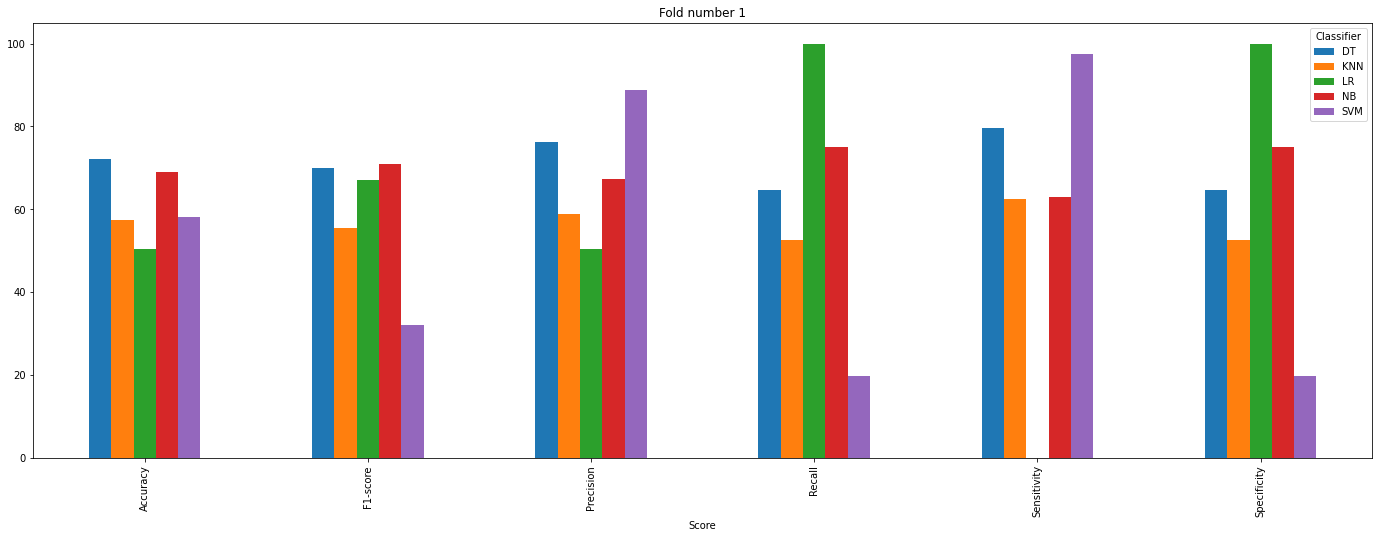

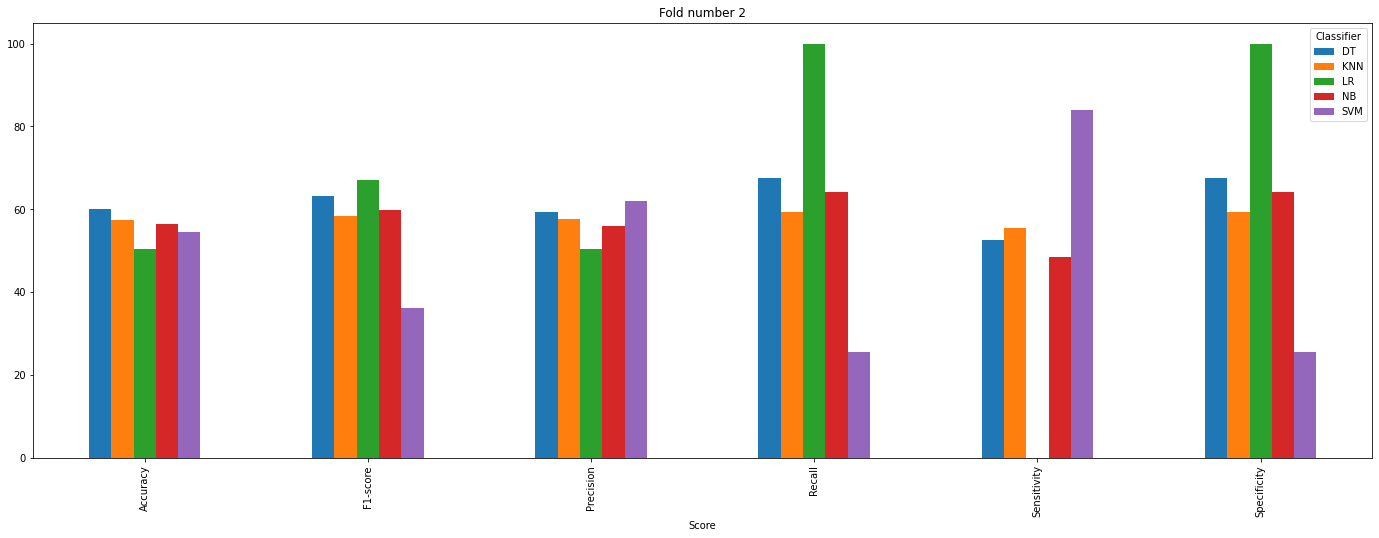

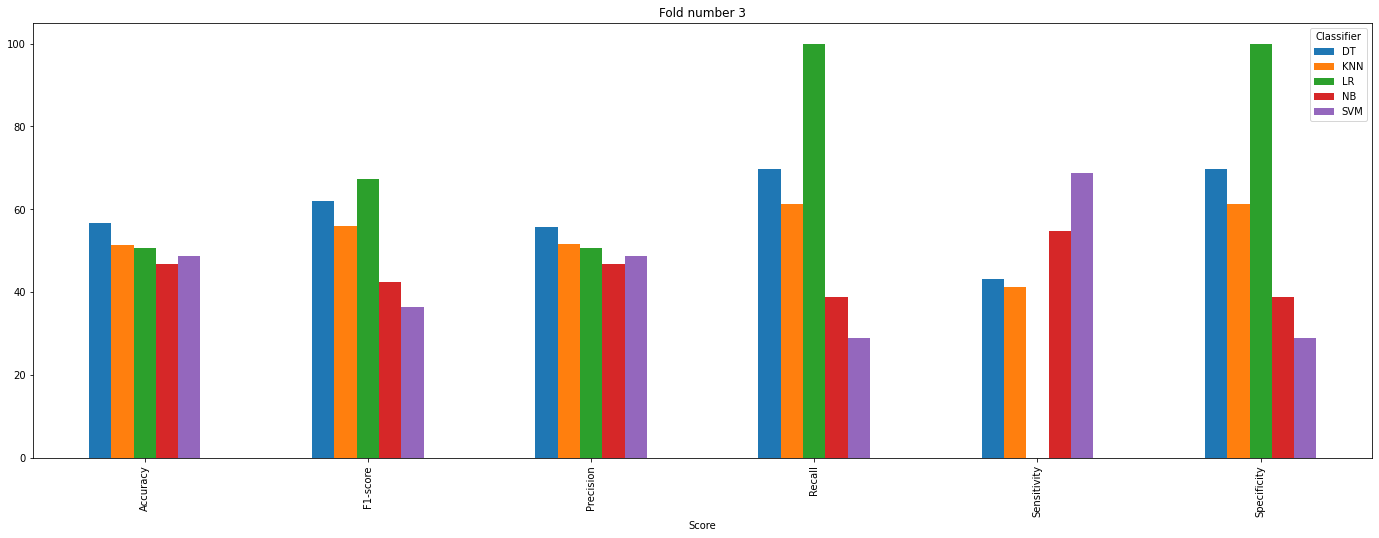

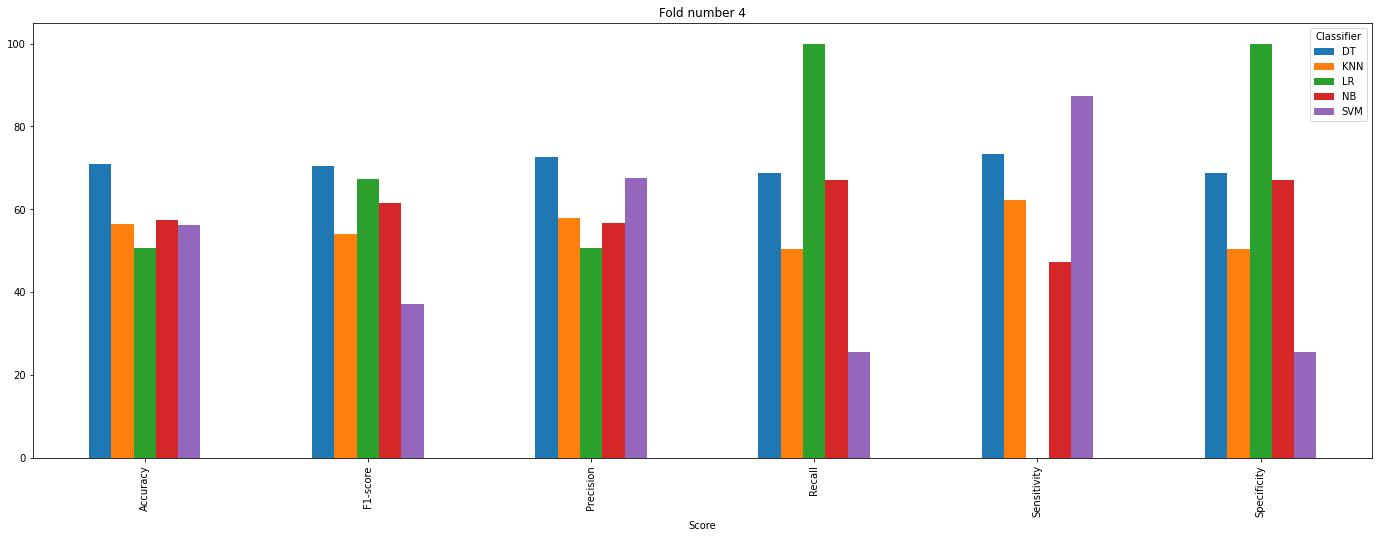

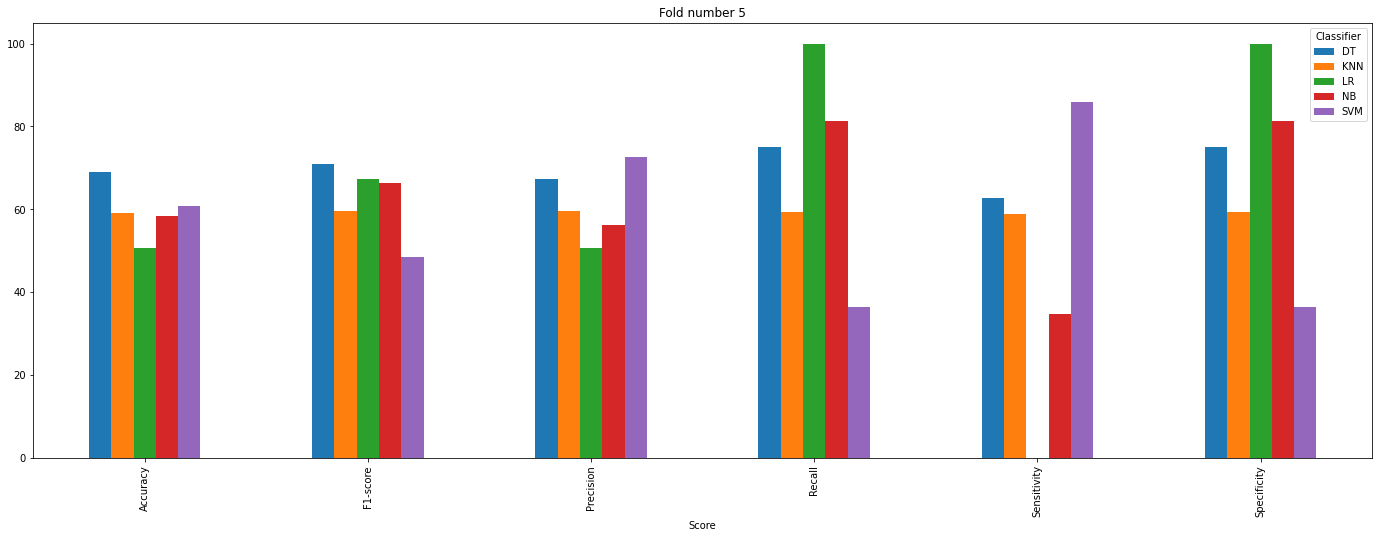

In [15]:
for i in range(5):
    second_fold_df = pd.DataFrame([
    ['DT', 'Accuracy', (decision_tree[i]['accuracy'] * 100)],
    ['NB', 'Accuracy', (naive_bayes[i]['accuracy'] * 100)],
    ['LR', 'Accuracy', (logical_regression[i]['accuracy'] * 100)],
    ['SVM', 'Accuracy', (support_vector_machine[i]['accuracy'] * 100)],
    ['KNN', 'Accuracy', (k_nearest_neighbor[i]['accuracy'] * 100)],
    
    ['DT', 'Precision', (decision_tree[i]['precision'] * 100)],
    ['NB', 'Precision', (naive_bayes[i]['precision'] * 100)],
    ['LR', 'Precision', (logical_regression[i]['precision'] * 100)],
    ['SVM', 'Precision', (support_vector_machine[i]['precision'] * 100)],
    ['KNN', 'Precision', (k_nearest_neighbor[i]['precision'] * 100)],
    
    ['DT', 'Recall', (decision_tree[i]['recall'] * 100)],
    ['NB', 'Recall', (naive_bayes[i]['recall'] * 100)],
    ['LR', 'Recall', (logical_regression[i]['recall'] * 100)],
    ['SVM', 'Recall', (support_vector_machine[i]['recall'] * 100)],
    ['KNN', 'Recall', (k_nearest_neighbor[i]['recall'] * 100)],
    
    ['DT', 'Specificity', (decision_tree[i]['specificity'] * 100)],
    ['NB', 'Specificity', (naive_bayes[i]['specificity'] * 100)],
    ['LR', 'Specificity', (logical_regression[i]['specificity'] * 100)],
    ['SVM', 'Specificity', (support_vector_machine[i]['specificity'] * 100)],
    ['KNN', 'Specificity', (k_nearest_neighbor[i]['specificity'] * 100)],
    
    ['DT', 'Sensitivity', (decision_tree[i]['sensitivity'] * 100)],
    ['NB', 'Sensitivity', (naive_bayes[i]['sensitivity'] * 100)],
    ['LR', 'Sensitivity', (logical_regression[i]['sensitivity'] * 100)],
    ['SVM', 'Sensitivity', (support_vector_machine[i]['sensitivity'] * 100)],
    ['KNN', 'Sensitivity', (k_nearest_neighbor[i]['sensitivity'] * 100)],
    
    ['DT', 'F1-score', (decision_tree[i]['f1-score'] * 100)],
    ['NB', 'F1-score', (naive_bayes[i]['f1-score'] * 100)],
    ['LR', 'F1-score', (logical_regression[i]['f1-score'] * 100)],
    ['SVM', 'F1-score', (support_vector_machine[i]['f1-score'] * 100)],
    ['KNN', 'F1-score', (k_nearest_neighbor[i]['f1-score'] * 100)],
                        
    ], columns = ['Classifier', 'Score', 'value'])
    second_fold_df.pivot("Score", "Classifier", "value").plot(kind='bar', figsize=(24, 8), title="Fold number {}".format(i + 1))
    plt.show()

## Getting all the score and Average them

In [25]:
class OverAllScore:
    def __init__(self, data, key_word):
        self.data = data
        self.key_word = key_word
        self.general_list = []
    
    def _get_list_according_to_key_word(self):
        for obj in self.data:
            self.general_list.append(obj[self.key_word])
    
    def get_average(self):
        self._get_list_according_to_key_word()
        return '{} - {}'.format(self.key_word, (sum(self.general_list) / len(self.data)) * 100)

# Decision Tree

In [26]:
key_word = ['accuracy', 'precision', 'f1-score', 'recall', 'sensitivity', 'specificity']

for key in key_word:
    obj = OverAllScore(decision_tree, key)
    print(obj.get_average())

accuracy - 65.74085448247058
precision - 66.2308123033081
f1-score - 67.31694106976019
recall - 69.11764705882352
sensitivity - 62.27939698492462
specificity - 69.11764705882352


# Naive Bayes

In [27]:
for key in key_word:
    obj = OverAllScore(naive_bayes, key)
    print(obj.get_average())

accuracy - 57.555585583372235
precision - 56.56440009987344
f1-score - 60.201851664158546
recall - 65.29411764705883
sensitivity - 49.63668341708542
specificity - 65.29411764705883


# Logical Regression

In [28]:
for key in key_word:
    obj = OverAllScore(logical_regression, key)
    print(obj.get_average())

accuracy - 50.570228238704765
precision - 50.570228238704765
f1-score - 67.17159455475593
recall - 100.0
sensitivity - 0.0
specificity - 100.0


# K Nearest Neighbor

In [29]:
for key in key_word:
    obj = OverAllScore(k_nearest_neighbor, key)
    print(obj.get_average())

accuracy - 56.320172960224056
precision - 57.106845768323
f1-score - 56.66689869545964
recall - 56.568627450980394
sensitivity - 56.062311557788945
specificity - 56.568627450980394


# Support Vector Machine

In [30]:
for key in key_word:
    obj = OverAllScore(support_vector_machine, key)
    print(obj.get_average())

accuracy - 55.62648944795223
precision - 67.92709370249477
f1-score - 37.98480134070147
recall - 27.156862745098042
sensitivity - 84.74221105527639
specificity - 27.156862745098042


## As we can see the most accurate score is Decision Tree, second would be Naive Bayes as to my Dataset.
### Some of the Classifiers were not able to predict very well, because of the too much features that I would want to predict, if I can only predict few feature with the target. I might get a different result in measuring these five classifiers. The only one that stands out in the evaluation is the decision tree, though it was the least of them in classification it did quite well in my dataset.

### Prediction was only about the feature of a song, whether he likes it or not. Therefore Decision tree was more efficient amongst the other classifiers. 
- accuracy - 65.74085448247058
- precision - 66.2308123033081
- f1-score - 67.31694106976019
- recall - 69.11764705882352
- sensitivity - 62.27939698492462
- specificity - 69.11764705882352

### Things that I learned in the project is that before we begin in mining we should first assess the dataset, and ask question as to what do we really want in our dataset, to be able to test which is the best classifier of them all, we test it through KFold and determine if which is the most accurate and precise classifier to predict our dataset. Now I know why machine learning is very significant in business world, science and technology it would make our decision more clear as it can already predict our behavior according to data.